#### Image Segmentation Task - 2
#### Name - Ishika Shrivastava
#### Roll No.- 20MIP10035

1.	Thresholding
2.	Region Based Image Segmentation
3.	Region growing Image Segmentation
4.	Edge based Image Segmentation
5.	Clustering
6.	ANN based Image Segmentation


1.	Thresholding

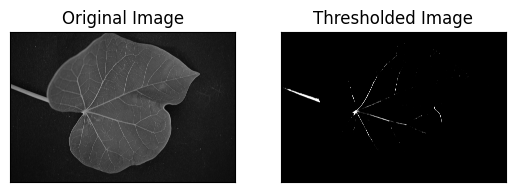

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image in grayscale
image = cv2.imread('/content/sample_data/image.JPG', cv2.IMREAD_GRAYSCALE)

# Apply simple thresholding
_, thresholded = cv2.threshold(image, 135, 275, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
plt.show()


2.	Region Based Image Segmentation

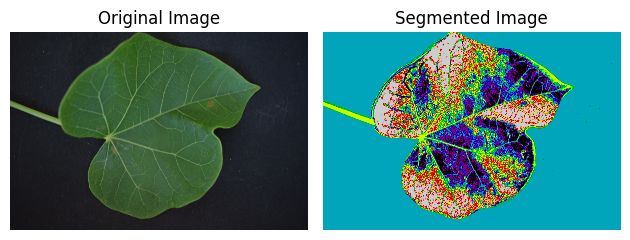

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/image.JPG')

# Convert the image to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Convert to floating-point for K-Means
pixels = np.float32(pixels)

# Define the criteria and number of clusters for K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
num_clusters = 4

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the cluster labels to a 2D mask
segmented_mask = labels.reshape(image.shape[0], image.shape[1])

# Display the original and segmented images
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_mask, cmap='nipy_spectral')
plt.title('Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()


3.	Region growing Image Segmentation

<ipython-input-10-a9366a5fc0fd>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((rows, cols), dtype=np.bool)
<ipython-input-10-a9366a5fc0fd>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  if not visited[row, col] and np.abs(image[row, col] - image[seed]) <= threshold:


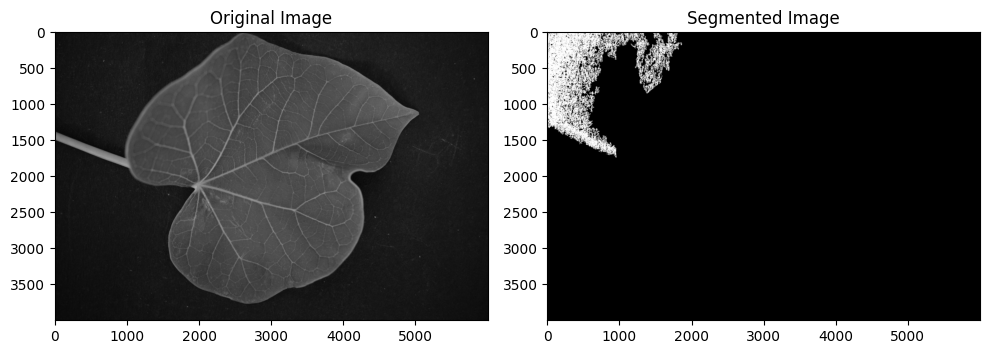

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def region_growing(seed, image, threshold):
    rows, cols = image.shape
    visited = np.zeros((rows, cols), dtype=np.bool)
    segmented = np.zeros((rows, cols), dtype=np.uint8)

    queue = []
    queue.append(seed)

    while queue:
        row, col = queue.pop(0)
        if not visited[row, col] and np.abs(image[row, col] - image[seed]) <= threshold:
            visited[row, col] = True
            segmented[row, col] = 255

            neighbors = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]
            for n_row, n_col in neighbors:
                if 0 <= n_row < rows and 0 <= n_col < cols:
                    queue.append((n_row, n_col))

    return segmented

# Load the image in grayscale
image = cv2.imread('/content/sample_data/image.JPG', cv2.IMREAD_GRAYSCALE)

# Seed point for region growing
seed_row, seed_col = 100, 100

# Define the region growing threshold
threshold = 10  # Adjust this threshold based on your image and requirements

# Perform region growing
segmented = region_growing((seed_row, seed_col), image, threshold)

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

plt.tight_layout()
plt.show()


4.	Edge based Image Segmentation

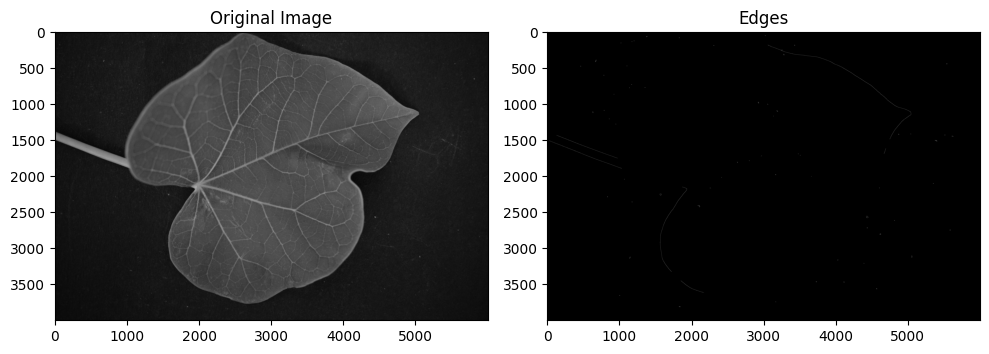

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image in grayscale
image = cv2.imread('/content/sample_data/image.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')

plt.tight_layout()
plt.show()


5.	Clustering

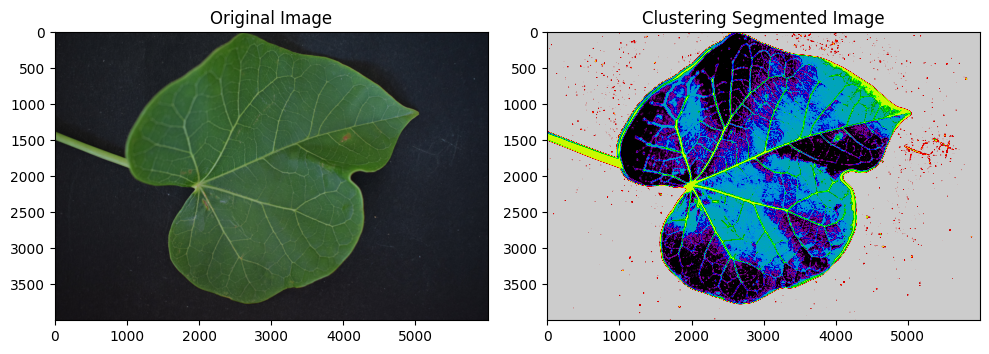

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('/content/sample_data/image.JPG')

# Convert the image to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Convert to floating-point for K-Means
pixels = np.float32(pixels)

# Define the criteria and number of clusters for K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
num_clusters = 4

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the cluster labels to a 2D mask
segmented_mask = labels.reshape(image.shape[0], image.shape[1])

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_mask, cmap='nipy_spectral')
plt.title('Clustering Segmented Image')

plt.tight_layout()
plt.show()


6.	ANN based Image Segmentation

1/1 [==============================] - 2s 2s/step


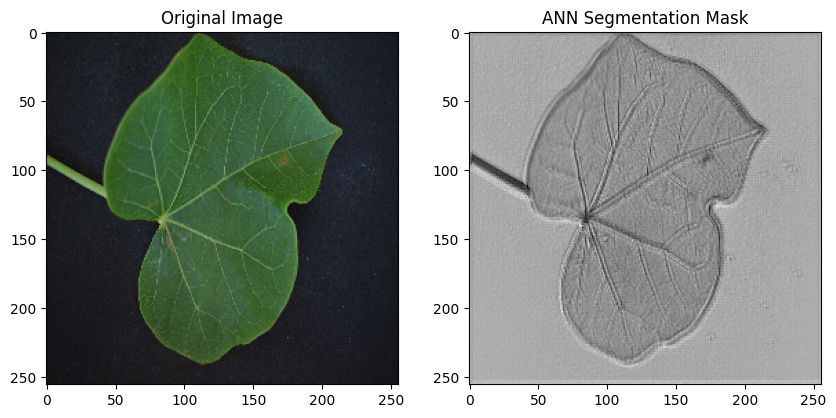

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the U-Net architecture
def unet(input_shape):
    inputs = keras.Input(input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Middle
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    upconv2 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv3)
    concat2 = layers.concatenate([conv2, upconv2], axis=-1)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat2)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)

    upconv1 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv4)
    concat1 = layers.concatenate([conv1, upconv1], axis=-1)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat1)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)

    # Output
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv5)

    model = keras.Model(inputs, outputs)
    return model

# Load and preprocess the image
def load_and_preprocess_image(image_path, target_size):
    image = keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image_array = keras.preprocessing.image.img_to_array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array

# Load the model
input_shape = (256, 256, 3)  # Adjust the input shape as needed
model = unet(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy')

# Load and preprocess the image
image_path = '/image.JPG'
input_image = load_and_preprocess_image(image_path, target_size=input_shape[:2])

# Perform segmentation
segmentation_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Post-process the mask if needed (thresholding, etc.)
# ...

# Display the original image and the segmentation mask
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask, cmap='gray')
plt.title('ANN Segmentation Mask')

plt.show()
